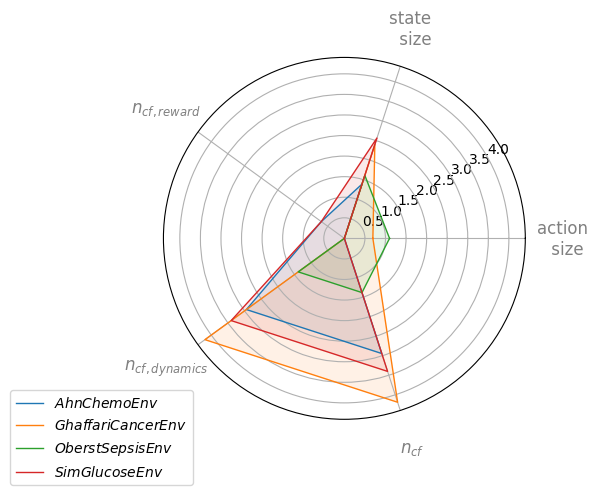

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X_VERTICAL_TICK_PADDING = 18
X_HORIZONTAL_TICK_PADDING = 18 

def create_radar_plot_from_df(df, save_path=None):
    # Categories are the dataframe columns
    categories = df.columns.tolist()
    num_vars = len(categories)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    plt.xticks(angles[:-1], categories, color='grey', size=12)
    ax.set_rlabel_position(30)
    
    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS[0::2]:
        tick.set_pad(X_VERTICAL_TICK_PADDING)
    
    for tick in XTICKS[1::2]:
        tick.set_pad(X_HORIZONTAL_TICK_PADDING)
    
    # Plot data and fill area for each entity (each DataFrame row)
    for index, row in df.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)
        ax.fill(angles, values, alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    # Add a title
    # plt.title(title, size=15, color='blue', y=1.1)

    # Show the plot
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.show()

# Sample DataFrame setup
data = {
    'action \n size': [1, 2, 3, 1],
    'state \n size': [4, 11, 4, 13],
    '$n_{cf, reward}$': [2, 2, 4, 1],
    '$n_{cf, dynamics}$': [15, 55, 18, 16],
    '$n_{cf}$': [15+4, 55+11, 18+4, 16+13]
}
df = pd.DataFrame(data, index=['$AhnChemoEnv$', '$GhaffariCancerEnv$', '$OberstSepsisEnv$', "$SimGlucoseEnv$"])

# Plotting the Radar chart from DataFrame
create_radar_plot_from_df(df)


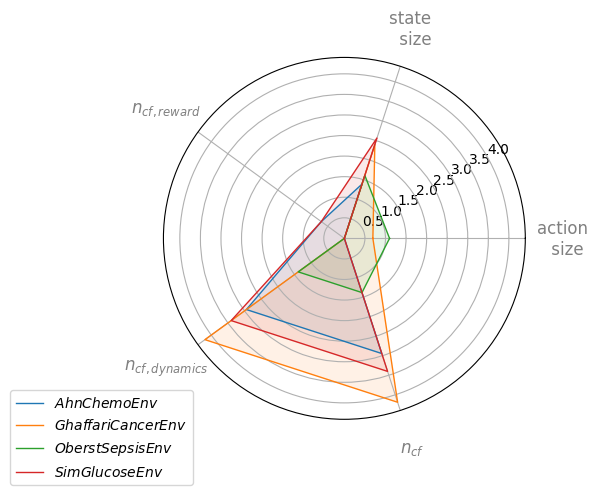

In [6]:
create_radar_plot_from_df(df, save_path='radar_plot.pdf')
# number of context features (ncf )
# the number of context features directly shaping the reward (ncf,reward) 
# the ones changing the dynamics (ncf,dynamics)